In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading Data and exploring columns, values, type of values, etc

In [2]:
data = pd.read_csv('./Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
object_col = list(data.select_dtypes('object'))

In [5]:
for cols in object_col:
    print('-'*40 + cols + '-'*40, end='\n')
    print(data[cols].value_counts())

----------------------------------------gender----------------------------------------
M    139
F     76
Name: gender, dtype: int64
----------------------------------------ssc_b----------------------------------------
Central    116
Others      99
Name: ssc_b, dtype: int64
----------------------------------------hsc_b----------------------------------------
Others     131
Central     84
Name: hsc_b, dtype: int64
----------------------------------------hsc_s----------------------------------------
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
----------------------------------------degree_t----------------------------------------
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
----------------------------------------workex----------------------------------------
No     141
Yes     74
Name: workex, dtype: int64
----------------------------------------specialisation----------------------------------------
Mkt&Fin    120
Mkt&HR   

In [6]:
data.shape

(215, 15)

In [7]:
x = data.loc[data['status']=='Not Placed']

In [8]:
x['salary'].isna().sum()

67

### We see people, who arent placed, their salary is 0 in data set. Hence Data set is correct and can be used without any issues. Only we'll be needing to convert Object to Numerical data

## Performing EDA

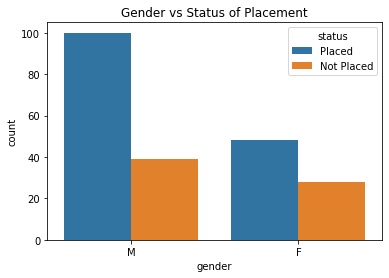

In [10]:
sns.countplot("gender", hue="status", data=data)
plt.title('Gender vs Status of Placement')
plt.show()

#### Observation from above Graph : Number of men placed are more

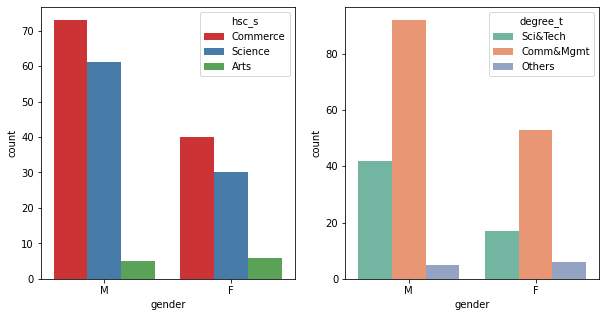

In [45]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), sharex=True)
sns.countplot("gender",hue='hsc_s',data=data, ax=axes[0], palette='Set1')

sns.countplot("gender", hue='degree_t', data=data, ax = axes[1],palette='Set2')
plt.show()

#### Above Graph : Gender vs Subject Chosen in High school and College

Text(0.5, 1.0, 'SSC Percentage vs If Placed')

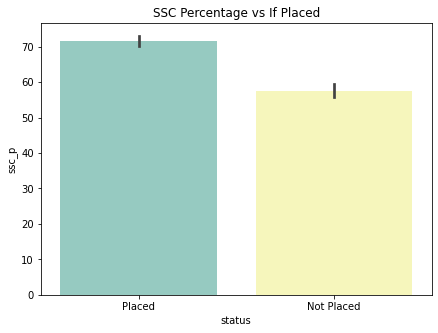

In [46]:
plt.figure(figsize=(7,5))
sns.barplot(x='status',y='ssc_p', data=data, palette='Set3')
plt.title('SSC Percentage vs If Placed')

Text(0.5, 1.0, 'HSC Percentage vs If Placed')

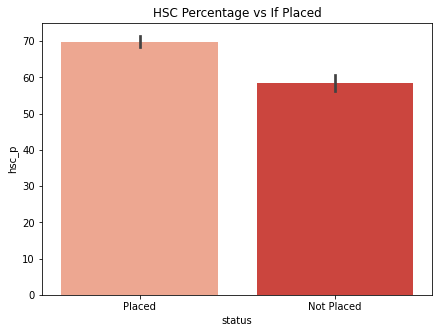

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(x='status',y='hsc_p', data=data, palette='Reds')
plt.title('HSC Percentage vs If Placed')

Text(0.5, 1.0, 'Degree Percentage vs If Placed')

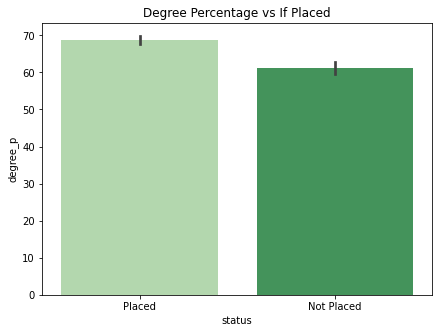

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(x='status',y='degree_p', data=data, palette='Greens')
plt.title('Degree Percentage vs If Placed')

Text(0.5, 1.0, 'Work Experience vs If Placed')

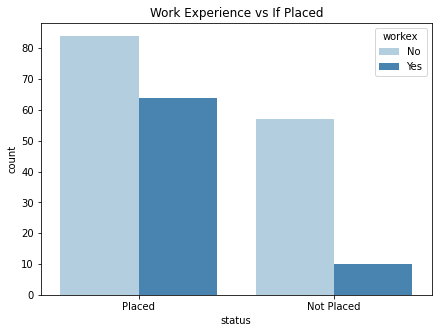

In [48]:
plt.figure(figsize=(7,5))
sns.countplot('status',hue='workex', data=data, palette='Blues')
plt.title('Work Experience vs If Placed')

Text(0.5, 1.0, 'Number of Students studying in Central vs Others')

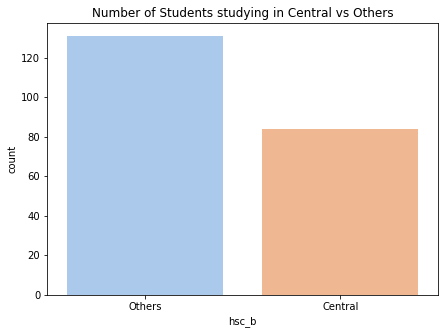

In [54]:
plt.figure(figsize=(7,5))
sns.countplot('hsc_b', data=data, palette='pastel')
plt.title('Number of Students studying in Central vs Others')

Text(0.5, 1.0, 'Number of Students studying in each Stream')

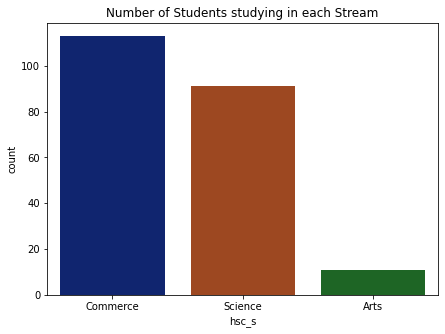

In [53]:
plt.figure(figsize=(7,5))
sns.countplot('hsc_s', data=data, palette='dark')
plt.title('Number of Students studying in each Stream')

Text(0.5, 1.0, 'Number of Students studying in each Course in College')

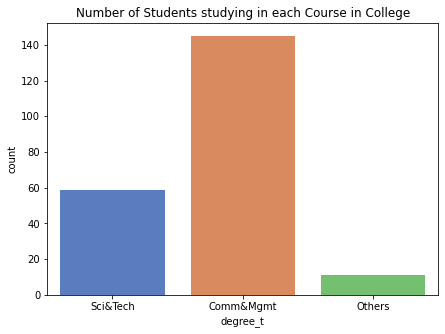

In [52]:
plt.figure(figsize=(7,5))
sns.countplot('degree_t', data=data, palette='muted')
plt.title('Number of Students studying in each Course in College')

Text(0.5, 1.0, 'HSC Stream vs Status of Placements')

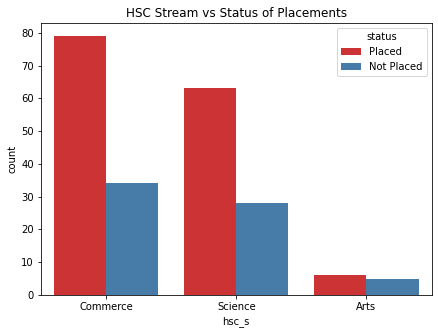

In [60]:
plt.figure(figsize=(7,5))
sns.countplot('hsc_s',hue='status', data=data,palette='Set1')
plt.title('HSC Stream vs Status of Placements')

Text(0.5, 1.0, 'College Degree vs Status of Placements')

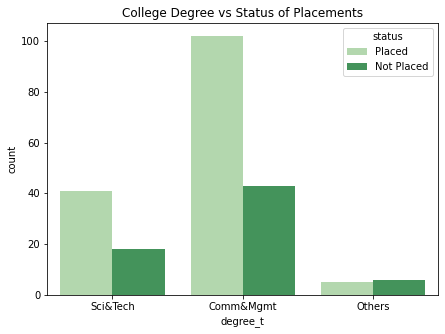

In [69]:
plt.figure(figsize=(7,5))
sns.countplot('degree_t',hue='status', data=data,palette='Greens')
plt.title('College Degree vs Status of Placements')

Text(0.5, 1.0, 'Work Experience vs Status of Placement')

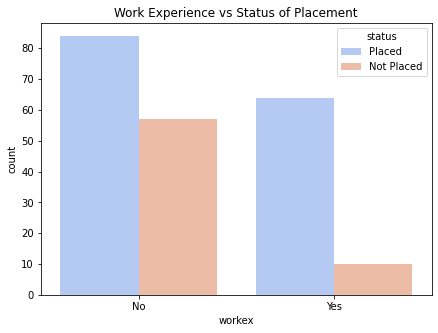

In [78]:
plt.figure(figsize=(7,5))
sns.countplot('workex',hue='status',data=data,palette='coolwarm')
plt.title('Work Experience vs Status of Placement')

In [79]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Students with Specialization and Work Experience')

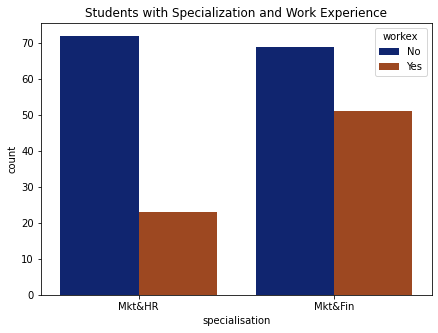

In [84]:
plt.figure(figsize=(7,5))
sns.countplot('specialisation',hue='workex',data=data,palette='dark')
plt.title('Students with Specialization and Work Experience')

Text(0.5, 1.0, 'MBA Percentage vs Status of Placement')

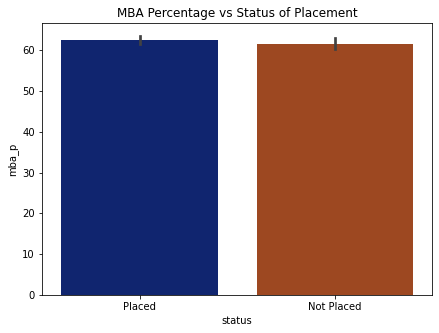

In [91]:
plt.figure(figsize=(7,5))
sns.barplot(x='status',y='mba_p',data=data,palette='dark')
plt.title('MBA Percentage vs Status of Placement')

## Data Preprocessing

In [97]:
data_copy = data.copy()
data_copy = data_copy.drop(['sl_no','ssc_b','hsc_b'],axis=1)
data_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [99]:
clean_data = {'gender' : {'M' : 0, 'F' : 1},
             'hsc_s' : {'Commerce' : 0, 'Science' : 1, 'Arts' : 2},
             'degree_t' : {'Sci&tech' : 0, 'Comm&Mgmt' : 1, 'other':2},
             'specialisation' : {'Mkt&HR' : 0, 'Mkt&Fin' : 1},
             'workex' : {'Yes' : 1, 'No' : 0},
             'status' : {'Not Placed' : 0, 'Placed' : 1}
             }

data_copy.replace(clean_data, inplace=True)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    int64  
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    object 
 6   workex          215 non-null    int64  
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    int64  
 9   mba_p           215 non-null    float64
 10  status          215 non-null    int64  
 11  salary          148 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 20.3+ KB


## We have 2 problem statements
### 1. Classify whether Student will get placed or not
### 2. Predict Salary